In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib_inline.backend_inline
import torch.nn.functional as F
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [40]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


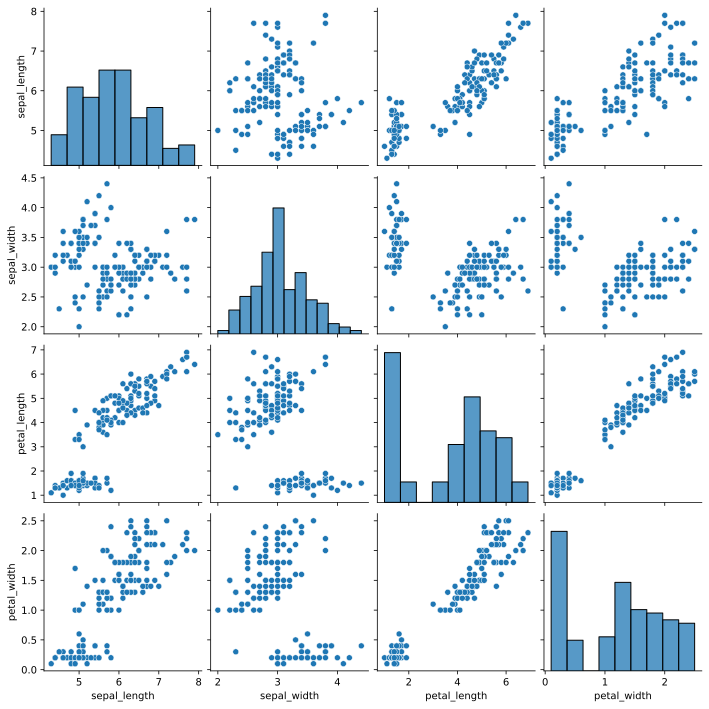

In [ ]:
import seaborn as sns
sns.pairplot(iris, hue='species')
plt.show()

In [42]:
features = torch.from_numpy(iris.values[:,:4].astype(np.float32))
labels = torch.from_numpy(pd.factorize(iris['species'])[0]).long()

In [43]:
features

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [44]:
class MyANNClass(nn.Module):
    def __init__(self, n_hidden_layers=2, n_neurons=2, features=4, categories=3):
        super().__init__()
        self.layer_dict = nn.ModuleDict()
        self.layers = n_hidden_layers

        self.layer_dict['input_layer'] = nn.Linear(features, n_neurons)

        for i in range(self.layers):
            self.layer_dict[f'hidden_layer_{i}'] = nn.Linear(n_neurons, n_neurons)

        self.layer_dict['output_layer'] = nn.Linear(n_neurons, categories)


    def forward(self, features):

        my_tensor = self.layer_dict['input_layer'](features)
        my_tensor.relu_()

        for i in range(self.layers):
            my_tensor = self.layer_dict[f'hidden_layer_{i}'](my_tensor)
            my_tensor.relu_()
            
        my_tensor = self.layer_dict['output_layer'](my_tensor)


        return my_tensor


In [45]:
n_neurons = 3
n_layers = 2
test_NN = MyANNClass(n_layers, n_neurons, 4, 3)
for i in test_NN.parameters():
    print(i)

Parameter containing:
tensor([[ 0.1778, -0.0996, -0.4561, -0.2891],
        [ 0.2376,  0.1825, -0.2590, -0.2151],
        [-0.4592, -0.4136, -0.1471,  0.0764]], requires_grad=True)
Parameter containing:
tensor([ 0.3517, -0.0342, -0.2653], requires_grad=True)
Parameter containing:
tensor([[ 0.4734,  0.0267, -0.2125],
        [-0.2791, -0.2935, -0.2425],
        [-0.4006, -0.1370,  0.5505]], requires_grad=True)
Parameter containing:
tensor([ 0.4028, -0.4380, -0.1826], requires_grad=True)
Parameter containing:
tensor([[-0.4596, -0.4788, -0.4591],
        [-0.3654, -0.0789, -0.4396],
        [ 0.2836,  0.3531,  0.1094]], requires_grad=True)
Parameter containing:
tensor([-0.5622, -0.2694, -0.3070], requires_grad=True)
Parameter containing:
tensor([[-0.5157, -0.2759, -0.0476],
        [-0.2459,  0.2746,  0.4008],
        [-0.2957, -0.2437,  0.0545]], requires_grad=True)
Parameter containing:
tensor([-0.1472,  0.5441,  0.4274], requires_grad=True)


In [46]:
def train_the_model(the_model, lr=0.1, epochs=1000):

    optimizer = torch.optim.SGD(the_model.parameters(), lr=lr)

    for epoch in range(epochs):

        y_hat = the_model(features)        
        loss_function = nn.CrossEntropyLoss()
        loss = loss_function(y_hat, labels)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    pred = the_model(features)
    pred_labels = torch.argmax(pred, axis=1)
    acc = 100*torch.mean((pred_labels == labels).float())

    return acc

In [47]:
torch.manual_seed(42)

model = MyANNClass()
accuracy = train_the_model(model)
print(accuracy)
with torch.no_grad():
    test_output = model(features[:10])
    predicted = torch.argmax(test_output, axis=1)
    actual = labels[:10]
    print(f"First 10 predictions: {predicted}")
    print(f"First 10 actual:      {actual}")

tensor(89.3333)
First 10 predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
First 10 actual:      tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
